<a href="https://colab.research.google.com/github/LucasGili/TheNuumFactory/blob/master/Demo_API_AI_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <p style="text-align: center;">AI-COMPARE | USING APIs</p>

###  <p style="text-align: center;"> </p>
##  <p style="text-align: center;">  Google Colab to realize tests on AI-Compare API</p>

<p><b>NB: Upload your data firt. Click on the files button on the left menu to do so.</b></p>

<a href="https://www.ai-compare.com/">AI-Compare</a>

<img src="https://www.ai-compare.com/static/images/Ai-compare_new.png" width="430"> 

<a href="https://www.ai-compare.com/my_apis/my_account">ENTER YOUR API TOKEN</a>

In [ ]:
headers = {'Authorization': 'Bearer {YOUR_API}'}
host = "https://api.ai-compare.com/"

In [ ]:
# Imports
import json
import requests

# Example I : Object detection feature in your own application


<a href="https://www.ai-compare.com/vision_apis/object_detection/">OBJECT DETECTION</a>

In [ ]:
# Object detection in image
def object_detection(filename, providers="['cognitives_service']"):
  with open(filename, 'rb') as f:
    response = requests.post(host+"v1/pretrained/vision/object_detection" , 
                            headers=headers,
                            data={'providers': providers},
                            files={"files": f})
    
  # Return results
  return json.loads(response.text)["result"]

In [ ]:
image_path = "Team AI-Compare.jpg"

# Detect objects in uploaded image
result = object_detection(image_path)[0]["result"]

# Transform output to coordinates to use with matplotlib
coordinates = [(x1,y1,x2-x1,y2-y1,lable) for (x1,y1,x2,y2,lable) in zip(
                            result["x_mins"], result["y_mins"],
                            result["x_maxs"], result["y_maxs"], 
                            result["labels"])]

In [ ]:
# Draw image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def draw(image_path, bbox):
  im = np.array(Image.open(image_path), dtype=np.uint8)
  w,h,d = im.shape

  # Create figure and axes
  fig,ax = plt.subplots(1)
  
  # Add lable text
  plt.text(bbox[0]*w,bbox[1]*h, bbox[4])

  # Display the image
  ax.imshow(im)
  # Create a Rectangle for bounding boxes
  rect = patches.Rectangle((bbox[0]*w,bbox[1]*h),bbox[2]*w,bbox[3]*h,
                           linewidth=1,edgecolor='r',facecolor='none')
  # Add the patch to the Axes
  ax.add_patch(rect)

  # Write lable

  plt.show()

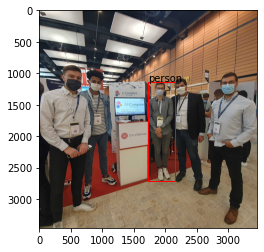

In [ ]:
draw(image_path, coordinates[2])

# Example II : Undertand a tender in a foreign language  


<a href="https://www.ai-compare.com/vision_apis/ocr/">OCR</a>


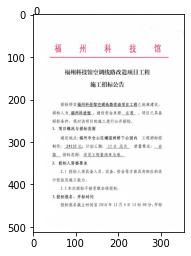

In [ ]:
draw("Document en chinois.jpg", [0,0,0,0,0])

In [ ]:
# Optical Character Recognition
def OCR(filename, language='English', providers="['google_cloud']"):
  with open(filename, 'rb') as f:
    response = requests.post(host+"v1/pretrained/vision/ocr" , 
                            headers=headers,
                            data={'providers': providers,
                                    'language': language},
                            files={"files": f})
    
  # Return results
  return json.loads(response.text)["result"]

In [ ]:
# Use a file uploaded in drive
result = OCR("Document en chinois.jpg", language="Chinese - Simplified")
ocr_ized_text = result[0]["final_text"]
print(result[0]["final_text"])

州 科 技 馆 福州科技馆空调线路改造项目工程 施工招标公告 招标项目福州科技館空调线路改造项目工程已批准建设, 相标人为_福州科技馆,建设资金来源_直等,项目己具备 招标条件,现对该项目的施工进行公开招标。 1.项目概况与招标范围 建设地点:福州市仓山区橘因洲桥下公园内 工程招标控 制价:29135元;计划工期:15日历天质量要求:_金 整_招标范围:详见工程量清单为准, 2. 投标人资格要求 2.1 投标人须具备人员、设备、资金等方面具有相应的设 计经验及施工能力, 2.2本次相标不接受联合体投标。 3.投标报名、开标时间 投标报名截止时间至 2018年12月4日 12时00分,开标 福


<a href="https://www.ai-compare.com/text_apis/automatic_translation">AUTO TRANSLATION</a> 


In [ ]:
# Automatic Translation function
def translate(text, source_language='en', target_language='fr', providers="['google_cloud']"):
  response = requests.post(host+"v1/pretrained/text/automatic_translation" , 
                           headers=headers, 
                           data = {'providers': providers, 'text_to_translate': text ,
                                   'source_language':source_language, 
                                   'target_language': target_language})

  # Return results
  return json.loads(response.text)["result"]

In [ ]:
result = translate(text=ocr_ized_text, source_language="zh-TW", target_language='fr')
translated_text = result[0]["result"]["translated_text"]
print(translated_text)

Musée des sciences et de la technologie de l'État de Fuzhou Musée des sciences et de la technologie Projet de reconstruction de la ligne de climatisation Projet de construction de l'appel d'offres Projet d'appel d'offres Musée des sciences et de la technologie de Fuzhou Projet de reconstruction de la ligne de climatisation Le projet a été approuvé pour la construction, le soumissionnaire est_Fuzhou Science and Technology Museum, la source des fonds de construction_Direct, le projet a les conditions de l'appel d'offres, maintenant Appel d'offres ouvert pour la construction de ce projet. 1. Aperçu du projet et portée de l'appel d'offres Lieu de construction: Prix de contrôle des appels d'offres du projet dans le parc du pont de Juyinzhou sous le pont de Juyinzhou dans le district de Cangshan, ville de Fuzhou: 29 135 yuans; Période de construction prévue: 15 jours civils Exigences de qualité: _ Jin Zheng _ Portée de l'offre: voir la liste des quantités du projet pour plus de détails Selon

<a href="https://www.ai-compare.com/text_apis/keyword_extraction/">KEYWORD 
</a>

In [ ]:
# Key words extraction
def kw_extract(text, language='fr-FR', providers="['aws']"):
  response = requests.post(host+"v1/pretrained/text/keyword_extraction" , 
                           headers=headers, 
                           data = {'providers': providers, 'text': text ,'language': 'fr-FR'})

  # Return results
  return json.loads(response.text)["result"]

In [ ]:
result = kw_extract(translated_text[:1000])
keywords = result[0]["result"]["keywords"]
print(keywords)

["Musée des sciences et de la technologie de l'État de Fuzhou", 'Musée des sciences et de la technologie', 'Projet de reconstruction de la ligne de climatisation', "Projet de construction de l'appel d'offres", "Projet d'appel d'offres", 'Musée des sciences et de la technologie de Fuzhou', 'Projet de reconstruction de la ligne de climatisation', 'Le projet', 'la construction', 'le soumissionnaire', 'Science and Technology Museum', 'la source des fonds de construction_Direct', 'le projet', "les conditions de l'appel d'offres", "maintenant Appel d'offres ouvert pour la construction de ce projet", '1', "Aperçu du projet et portée de l'appel d'offres", 'Lieu de construction', "Prix de contrôle des appels d'offres du projet dans le parc du pont de Juyinzhou sous le pont de Juyinzhou dans le district de Cangshan", 'ville de Fuzhou', '29', '135 yuans', 'Période de construction', '15 jours civils', 'Exigences de qualité', 'Jin', 'Zheng', 'Portée de', "l'offre", 'la liste des quantités du projet

# Exemple III : Feeling (very) lazy


[TEXT TO SPEECH](https://www.ai-compare.com/audio_apis/text_to_speech)


In [ ]:
# Text to speech
def read_this_text(text, language='fr-FR', providers="['ibm']", option="FEMALE"):
  response = requests.post(host+"v1/pretrained/audio/text_to_speech" , 
                           headers=headers, 
                           data = {'providers': providers, 'text': text ,
                                   'language': language, 'option': option})
  
  # Return the results
  return json.loads(response.text)["result"]

In [ ]:
result = read_this_text("Les mots clé trouvés par AI-Compare sont : "+", ".join(keywords)[:250])

# Read audio file
from IPython.display import Audio
Audio(url=host+result[0]["result"]["audio_path"])